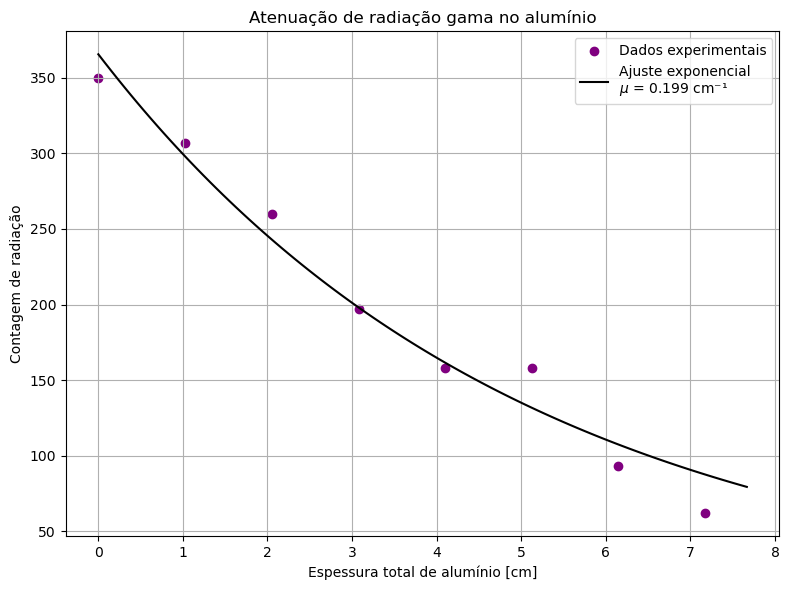

Coeficiente de absorção linear (μ): 0.1991 cm⁻¹
Coeficiente de absorção mássico (μ/ρ): 0.0737 cm²/g
Seção de choque de absorção (σ): 3.31 barn


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Dados fornecidos ---
espessuras_individuais = [1.025, 1.018, 1.026, 1.022, 1.026, 1.024, 1.026]  # cm
espessuras_individuais = np.array(espessuras_individuais)

# Soma cumulativa das espessuras dos blocos, do 7º até o 1º
espessuras_totais = np.array([
    0,
    sum(espessuras_individuais[6:7]),
    sum(espessuras_individuais[5:7]),
    sum(espessuras_individuais[4:7]),
    sum(espessuras_individuais[3:7]),
    sum(espessuras_individuais[2:7]),
    sum(espessuras_individuais[1:7]),
    sum(espessuras_individuais[0:7])
])

contagens = np.array([350, 307, 260, 197, 158, 158, 93, 62])

# --- Função de decaimento exponencial ---
def ajuste_exponencial(x, I0, mu):
    return I0 * np.exp(-mu * x)

# --- Ajuste dos dados ---
parametros, _ = curve_fit(ajuste_exponencial, espessuras_totais, contagens, p0=(350, 0.1))
I0_ajustado, mu = parametros

# --- Gráfico ---
x_vals = np.linspace(0, max(espessuras_totais) + 0.5, 100)
y_ajuste = ajuste_exponencial(x_vals, I0_ajustado, mu)

plt.figure(figsize=(8, 6))
plt.scatter(espessuras_totais, contagens, label='Dados experimentais', color='purple')
plt.plot(x_vals, y_ajuste, label=f'Ajuste exponencial\n$\\mu$ = {mu:.3f} cm⁻¹', color='black')
plt.xlabel('Espessura total de alumínio [cm]')
plt.ylabel('Contagem de radiação')
plt.title('Atenuação de radiação gama no alumínio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_absorcao_aluminio.png", dpi=300)
plt.show()

# --- Saída dos parâmetros ---
print(f"Coeficiente de absorção linear (μ): {mu:.4f} cm⁻¹")

# --- Cálculo do coeficiente de absorção mássico ---
densidade_aluminio = 2.70  # g/cm³
massa_molar_al = 27.0  # g/mol
NA = 6.022e23  # átomos/mol

mu_massico = mu / densidade_aluminio  # cm²/g
print(f"Coeficiente de absorção mássico (μ/ρ): {mu_massico:.4f} cm²/g")

# --- Cálculo da seção de choque (σ), com a fórmula compatível com barns ---
# σ = (μ / ρ) / (NA / A)
sigma_cm2 = mu_massico / (NA / massa_molar_al)  # cm²
sigma_barn = sigma_cm2 * 1e24  # conversão para barn

print(f"Seção de choque de absorção (σ): {sigma_barn:.2f} barn")

/var/folders/_4/4_jgl64j4s9bfwjs2dlqlrbh0000gn/T/ipykernel_79955/4154574250.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_vals, fit_vals, 'k--', label=f'Ajuste exponencial\n$\\mu$ = {mu_fit:.3f} cm⁻¹', color='black')


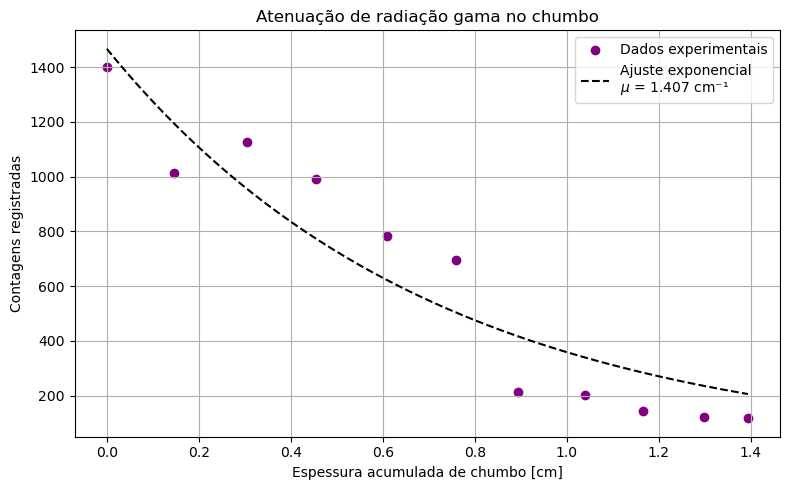

Coeficiente de absorção linear (μ): 1.4067 ± 0.2230 cm⁻¹
Coeficiente de absorção mássico (μ/ρ): 0.1240 cm²/g
Seção de choque de absorção (σ): 42.68 barn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados das espessuras individuais das 10 chapas (em cm)
espessuras_chapas = [0.145, 0.160, 0.150, 0.155, 0.150, 0.135, 0.145, 0.125, 0.133, 0.096]
espessuras_acumuladas = [0]  # Começa sem nenhuma chapa

# Calcula espessuras acumuladas
for i in range(1, len(espessuras_chapas) + 1):
    espessuras_acumuladas.append(sum(espessuras_chapas[:i]))

# Contagens experimentais para cada número de chapas
contagens = [1400, 1015, 1125, 993, 784, 695, 212, 204, 146, 123, 118]
espessuras_acumuladas = np.array(espessuras_acumuladas)
contagens = np.array(contagens)

# Define a função exponencial para ajuste
def exponencial(x, I0, mu):
    return I0 * np.exp(-mu * x)

# Ajuste dos dados
params, cov = curve_fit(exponencial, espessuras_acumuladas, contagens, p0=[1400, 1])
I0_fit, mu_fit = params

# Calcula o desvio padrão dos parâmetros ajustados
erro_mu = np.sqrt(cov[1][1])

# Gera valores ajustados para o gráfico
x_vals = np.linspace(0, max(espessuras_acumuladas), 200)
fit_vals = exponencial(x_vals, I0_fit, mu_fit)

# Gráfico
plt.figure(figsize=(8,5))
plt.scatter(espessuras_acumuladas, contagens, color='purple', label='Dados experimentais')
plt.plot(x_vals, fit_vals, 'k--', label=f'Ajuste exponencial\n$\\mu$ = {mu_fit:.3f} cm⁻¹', color='black')
plt.xlabel("Espessura acumulada de chumbo [cm]")
plt.ylabel("Contagens registradas")
plt.title("Atenuação de radiação gama no chumbo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_absorcao_chumbo.png", dpi=300)  # salva como PNG
plt.show()

# Constantes
densidade_pb = 11.34  # g/cm³
massa_molar_pb = 207.2  # g/mol
NA = 6.022e23  # 1/mol

# Cálculo dos coeficientes
mu_massico = mu_fit / densidade_pb  # cm²/g
sigma_cm2 = mu_massico / (NA / massa_molar_pb)  # cm²
sigma_barn = sigma_cm2 * 1e24  # conversão para barn

# Exibe resultados
print(f"Coeficiente de absorção linear (μ): {mu_fit:.4f} ± {erro_mu:.4f} cm⁻¹")
print(f"Coeficiente de absorção mássico (μ/ρ): {mu_massico:.4f} cm²/g")
print(f"Seção de choque de absorção (σ): {sigma_barn:.2f} barn")
